In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
from tensorflow.keras.utils import image_dataset_from_directory

In [3]:
training_set = image_dataset_from_directory(
    "./train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 76515 files belonging to 4 classes.


In [4]:
validation_set = image_dataset_from_directory(
    './val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 21861 files belonging to 4 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [6]:
INPUT_SHAPE = (224, 224, 3)

In [7]:
mobnet = tf.keras.applications.MobileNetV3Large(
    input_shape=INPUT_SHAPE,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
    # name="MobileNetV3Large",
)

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.applications.MobileNetV3Large(input_shape=INPUT_SHAPE, include_top=False, weights="imagenet"))
model.add(tf.keras.layers.GlobalAveragePooling2D())  # Converts feature maps to a vector
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))  # Classification layer

metrics_list = ['accuracy', tf.keras.metrics.F1Score()]  # Ensure num_classes is set
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=metrics_list)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 7, 7, 960)      │     2,996,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 960)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         3,844 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,000,196 (11.44 MB)

 Trainable params: 2,975,796 (11.35 MB)

 Non-trainable params: 24,400 (95.31 KB)

In [10]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15


2392/2392 ━━━━━━━━━━━━━━━━━━━━ 4279s 2s/step - accuracy: 0.9079 - f1_score: 0.8409 - loss: 0.2642 - val_accuracy: 0.9557 - val_f1_score: 0.9202 - val_loss: 0.1356
Epoch 2/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 6382s 3s/step - accuracy: 0.9706 - f1_score: 0.9488 - loss: 0.0853 - val_accuracy: 0.9700 - val_f1_score: 0.9468 - val_loss: 0.1003
Epoch 3/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 4834s 2s/step - accuracy: 0.9823 - f1_score: 0.9692 - loss: 0.0520 - val_accuracy: 0.9710 - val_f1_score: 0.9494 - val_loss: 0.1137
Epoch 4/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 5527s 2s/step - accuracy: 0.9884 - f1_score: 0.9797 - loss: 0.0332 - val_accuracy: 0.9653 - val_f1_score: 0.9385 - val_loss: 0.1507
Epoch 5/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 4718s 2s/step - accuracy: 0.9907 - f1_score: 0.9841 - loss: 0.0267 - val_accuracy: 0.9692 - val_f1_score: 0.9470 - val_loss: 0.1417
Epoch 6/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 5669s 2s/step - accuracy: 0.9927 - f1_score: 0.9872 - loss: 0.0207 - val_accuracy: 0.9675 - val_f1_

In [11]:
model.save("Trained_Model.h5")

In [12]:
# Saving history
with open('Training_history.pkl', 'wb') as f:
    pickle.dump(training_history.history, f)

In [13]:
#Reloading History from pickle
with open('Training_history.pkl', 'rb') as f:
    load_history = pickle.load(f)
load_history

{'accuracy': [0.9426909685134888,
  0.9742664694786072,
  0.9849310517311096,
  0.9896098971366882,
  0.9922890663146973,
  0.9929295182228088,
  0.9934261441230774,
  0.993975043296814,
  0.994863748550415,
  0.994654655456543,
  0.9950597882270813,
  0.995438814163208,
  0.9950336813926697,
  0.9957001805305481,
  0.9955825805664062],
 'f1_score': [<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9511224 , 0.8983061 , 0.78111213, 0.97252405], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9780301 , 0.96409035, 0.88952345, 0.988185  ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.98691785, 0.981202  , 0.93254507, 0.9932982 ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9911885 , 0.9866139 , 0.95391065, 0.9952776 ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9933018, 0.9909354, 0.9652453, 0.9965268], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array(

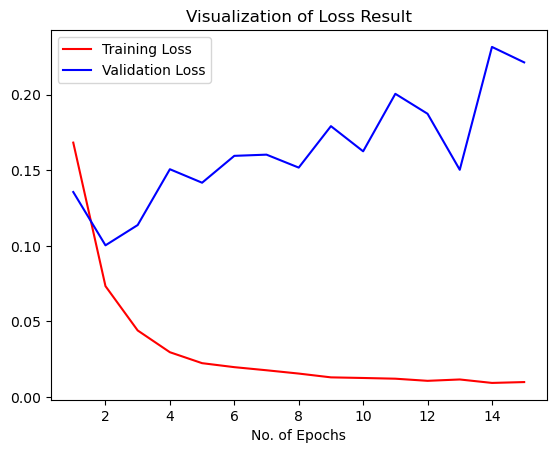

In [14]:
#Loss Visualization
epochs = [i for i in range(1,16)]
plt.plot(epochs,load_history['loss'],color='red',label='Training Loss')
plt.plot(epochs,load_history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()

In [15]:
test_set = validation_set = image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10933 files belonging to 4 classes.


In [16]:
test_loss,test_acc,f1_score = model.evaluate(test_set)

171/171 ━━━━━━━━━━━━━━━━━━━━ 122s 710ms/step - accuracy: 0.9693 - f1_score: 0.9470 - loss: 0.2163


In [17]:
test_loss

0.2407347857952118

In [18]:
test_acc

0.9700905680656433

In [19]:
f1_score

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9757469 , 0.95288414, 0.8768361 , 0.985717  ], dtype=float32)>

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 7, 7, 960)      │     2,996,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 960)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         3,844 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,951,790 (34.15 MB)

 Trainable params: 2,975,796 (11.35 MB)

 Non-trainable params: 24,400 (95.31 KB)

 Optimizer params: 5,951,594 (22.70 MB)

In [22]:
##Computing True labels from test set
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

2025-04-07 04:54:41.953525: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [23]:
Y_true

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 1, 3, ..., 3, 3, 3])>

In [24]:
##Computing Predicted labels using test set
predicted_categories = model.predict(test_set)
Y_pred = tf.argmax(predicted_categories, axis=1)

171/171 ━━━━━━━━━━━━━━━━━━━━ 124s 720ms/step


In [25]:
Y_true

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 1, 3, ..., 3, 3, 3])>

In [26]:
Y_pred

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([2, 1, 0, ..., 0, 3, 0])>

In [27]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred))

              precision    recall  f1-score   support

           0       0.34      0.33      0.34      3746
           1       0.09      0.09      0.09      1161
           2       0.10      0.10      0.10       887
           3       0.47      0.47      0.47      5139

    accuracy                           0.35     10933
   macro avg       0.25      0.25      0.25     10933
weighted avg       0.35      0.35      0.35     10933



In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true,Y_pred)
cm

array([[1252,  402,  300, 1792],
       [ 394,   99,   87,  581],
       [ 288,   97,   88,  414],
       [1783,  512,  408, 2436]])

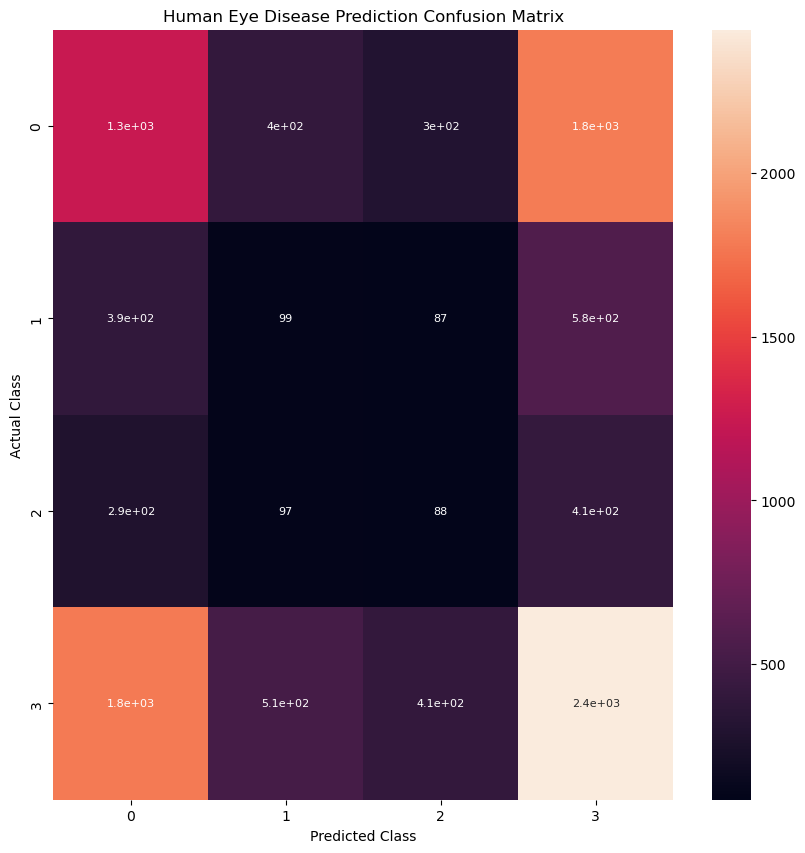

In [29]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,annot_kws={"size":8})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Human Eye Disease Prediction Confusion Matrix",fontsize=12)
plt.show()

In [31]:
model.save("Trained_Model.keras") 

In [32]:
model = tf.keras.models.load_model("Trained_Model.keras")

/Applications/anaconda/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 174 variables whereas the saved optimizer has 346 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
